In [0]:
!pip install bubbly

  Created wheel for bubbly: filename=bubbly-1.0.2-cp36-none-any.whl size=5428 sha256=b9b12388795060bf26973cea34925d141beefbe2d57cc4bd5b7eeeb2a116d232
  Stored in directory: /root/.cache/pip/wheels/cf/3c/75/8c09dbf7cd6b320b69a6bc679fd111abd1139866c722b1476b
Successfully built bubbly


In [0]:
!pip install pandas-profiling

In [0]:
!pip install shap

     |████████████████████████████████| 276kB 2.9MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394114 sha256=3a011e2d17100c070f0adf9abb6b64a2dfa752719578472fe2b7a8116e219e17
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


***Importing important libraries for developing the model***

In [0]:
# for basic operations
import numpy as np
import pandas as pd
import pandas_profiling

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for advanced visualizations 
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot

# for providing path
import os
print(os.listdir('/content/sample_data'))

# for model explanation
import shap

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


['anscombe.json', 'README.md', 'mnist_train_small.csv', 'california_housing_train.csv', 'mnist_test.csv', 'california_housing_test.csv']


In [0]:
data=pd.read_csv('/content/heart.csv')
data.shape

(303, 14)

In [0]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [0]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


     | 46.8MB 660kB/s
     |████████████████████████████████| 61kB 3.2MB/s 
     |████████████████████████████████| 604kB 8.4MB/s 
     |████████████████████████████████| 3.1MB 37.9MB/s 
     |████████████████████████████████| 71kB 8.9MB/s 
     |████████████████████████████████| 296kB 47.0MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.8.0-py2.py3-none-any.whl size=259932 sha256=f7f1118ae1e285a2456533811a9b2100cfab63054062d90df09de335a6ebe925
  Stored in directory: /tmp/pip-ephem-wheel-cache-jnm1fnbb/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=4c7b61e39c82391b6f5bfe81f1bf84bdb2436d0430513ff2d88e9aeb04e25835
  Stored in directory: /root/.cache/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=ba71ea0153c241c7af1b218228a4776b92296223d2a6a6480f921

In [0]:
profile=pandas_profiling.ProfileReport(data)
profile

In [0]:
data.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.title('Distribution of Target', fontsize = 20)

Text(0.5, 1.0, 'Distribution of Target')

There are 165 members with heart disease and 138 members without hear disease

***Dividing the features into categorial and continuous***

In [0]:
categorical_val = []
continous_val = []
for column in data.columns:
    print('==============================')
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

***Visualizing how many people with and without heart disease for each categorical feature***

In [0]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

* In this plot, we can assume that Males are two times more likely to suffer from heart diseases in comparison to females. This because in the dataset there are around 70% men appeared for tests and women only around 30%

* restecg {resting electrocardiographic results} : People with value 1 (signals non-normal heart beat, can range from mild symptoms to severe problems) are more likely to have heart disease.

* exang {exercise induced angina} : People with value 0 (No ==> exercice induced angina) have heart disease more than people with value 1 (Yes ==> exercice induced angina)

* slope {the slope of the peak exercise ST segment} : People with slope value equal to 2 (Downslopins: signs of unhealthy heart) are more likely to have heart disease than people with slope value equal to 0 (Upsloping: better heart rate with excercise) or 1 (Flatsloping: minimal change (typical healthy heart)).

* ca {number of major vessels (0-3) colored by flourosopy} : the more blood movement the better so people with ca equal to 0 are more likely to have heart disease.

* thal {thalium stress result} : People with thal value equal to 2 (fixed defect: used to be defect but ok now) are more likely to have heart disease




In [0]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 3, i)
    data[data["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    data[data["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

* trestbps : resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

* chol {serum cholestoral in mg/dl} : above 200 is cause for concern.

* thalach {maximum heart rate achieved} : People how acheived a maximum more than 140 are more likely to have heart disease.

* oldpeak ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more




In [0]:
plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('ggplot')

sns.heatmap(data.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

In this above heat map the correlations among the attributes is very low for all the features i.e all the features having corelation between 0 - 0.5 and 0 - -0.5, except for slope and oldpeak with correlation of -0.58. we don't drop any attributes from the dataset ,Even though we drop one attribute between slope or oldpeak there won't be any significant change in the performance

In [0]:
data.drop('target', axis=1).corrwith(data.target).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

* fbs and chol are the lowest correlated with the target variable.
* All other variables have a significant correlation with the target variable.





In [0]:
categorical_val.remove('target')
dataset = pd.get_dummies(data, columns = categorical_val)

In [0]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [0]:
print(data.columns)
print(dataset.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


In [0]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [0]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [0]:
dataset

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1


***Splitting the data into training and testing sets***

In [0]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# getting the shapes
print("Shape of x_train :", X_train.shape)
print("Shape of x_test :", X_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (242, 30)
Shape of x_test : (61, 30)
Shape of y_train : (242,)
Shape of y_test : (61,)


***Random Forest classifier (Confusion matrix and accuracy)***

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators = 100, max_depth = 5)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# evaluating the model
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

# cofusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# classification report
cr = classification_report(y_test, y_pred)
print(cr)


Training Accuracy : 0.9338842975206612
Testing Accuracy : 0.8852459016393442
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [0]:
train_score= model.score(X_train, y_train) * 100
test_score = model.score(X_test, y_test) * 100

results_dframe_ = pd.DataFrame(data=[["Random forest", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_dframe_

,Model,Training Accuracy %,Testing Accuracy %
0,Random forest,93.38843,88.52459


***KNN classifier (Confusion matrix and accuracy)***

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
model_knn = KNeighborsClassifier()

model_knn.fit(X_train, y_train)
y_predict = model_knn.predict(X_test)
y_pred_quant = model_knn.predict_proba(X_test)[:, 1]
y_pred = model_knn.predict(X_test)

# evaluating the model
print("Training Accuracy :", model_knn.score(X_train, y_train))
print("Testing Accuracy :", model_knn.score(X_test, y_test))

# cofusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.8760330578512396
Testing Accuracy : 0.9016393442622951
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [0]:
train_score = model_knn.score(X_train, y_train) * 100
test_score = model_knn.score(X_test, y_test) * 100

results_df_2__ = pd.DataFrame(data=[["KNN", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_dframe_ = results_dframe_.append(results_df_2__, ignore_index=True)
results_dframe_

,Model,Training Accuracy %,Testing Accuracy %
0,Random forest,93.388430,88.524590
1,KNN,87.603306,90.163934


***Logistic regression (Confusion matrix and accuracy)***

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
model_log = LogisticRegression(solver='liblinear')

model_log.fit(X_train, y_train)
y_predict = model_log.predict(X_test)
y_pred_quant = model_log.predict_proba(X_test)[:, 1]
y_pred = model_log.predict(X_test)

# evaluating the model
print("Training Accuracy :", model_log.score(X_train, y_train))
print("Testing Accuracy :", model_log.score(X_test, y_test))

# cofusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.8760330578512396
Testing Accuracy : 0.8852459016393442
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [0]:
_train_score = model_log.score(X_train, y_train) * 100
test_score = model_log.score(X_test, y_test) * 100

results_df_3__ = pd.DataFrame(data=[["Logistic regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_dframe_ = results_dframe_.append(results_df_3__, ignore_index=True)
results_dframe_

,Model,Training Accuracy %,Testing Accuracy %
0,Random forest,93.388430,88.524590
1,KNN,87.603306,90.163934
2,Logistic regression,87.603306,88.524590


In the above classification models we can observe that KNN performed better in classifying the outputs when compared to other models with an accuracy of 90.16%

***Ensemble learning (Voting classifier (Hard voting))***

In [0]:
#Ensemble learning (Voting classifier (Hard voting))

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import statistics 
model1 = RandomForestClassifier(n_estimators = 50, max_depth = 5)
model2 = KNeighborsClassifier()
model3 = LogisticRegression()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
pred3=model3.predict(X_test)

final_pred = np.array([])
for i in range(0,len(X_test)):
    final_pred = np.append(final_pred, statistics.mode([pred1[i], pred2[i], pred3[i]]))

In the above cell we had taken the mode of all the classifier predictions and finalized the output.

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, final_pred)

0.9016393442622951

In [0]:
test_score = accuracy_score(y_test, final_pred) * 100
train_score='-'
results_df_4__ = pd.DataFrame(data=[["Voting classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_dframe_ = results_dframe_.append(results_df_4__, ignore_index=True)
results_dframe_

,Model,Training Accuracy %,Testing Accuracy %
0,Random forest,93.3884,88.524590
1,KNN,87.6033,90.163934
2,Logistic regression,87.6033,88.524590
3,Voting classifier,-,90.163934


In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
final_pred
cm = confusion_matrix(y_test, final_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# classification report
cr = classification_report(y_test, final_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [0]:
#Ensemble learning (Voting classifier (Hard voting))

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import statistics 
model1 = RandomForestClassifier(n_estimators = 50, max_depth = 5)
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict(X)
pred2=model2.predict(X)
pred3=model3.predict(X)

final_pred = np.array([])
for i in range(0,len(X)):
    final_pred = np.append(final_pred, statistics.mode([pred1[i], pred2[i], pred3[i]]))

***Plotting a bar graph for the predictions of all the samples***

In [0]:
count = 0
count1=0
for ele in final_pred: 
      if (ele == 1): 
          count = count + 1
      elif (ele == 0):
          count1 = count1 +1     
   
  
data.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.title('Actual values distribution', fontsize = 20)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['1','0']
students = [count,count1]
ax.bar(langs,students)
ax.set_title('Predicted values distribution')
plt.show()

* '1' --> Having heart disease

* '0' --> not having heart disease



In [0]:
count1


134

In [0]:
count

169

In [0]:
print(data.loc[[1]])

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1

[1 rows x 14 columns]


In [0]:
a=[[63,1,3,145,233,1,0,150,0,2.3,0,0,1]]
print(a[0][0])

63


***Mean and standard deviation for the attributes with continuous values where standscalar technique is used while preprocessing***

In [0]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scal = ['age']

save_a = s_sc.fit(data[['age']])
newdata=np.array([63]).reshape(1,-1)
final = save_a.transform(newdata)
age_mean= data[['age']].mean()
age_std= data[['age']].std(axis = 0, skipna = False)
age_transform= (-age_mean)/age_std
final

array([[0.9521966]])

In [0]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scal = ['trestbps']

save_b = s_sc.fit(data[['trestbps']])
newdata=np.array([145]).reshape(1,-1)
final_b = save_b.transform(newdata)
final_b

array([[0.76395577]])

In [0]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scal = ['thalach']

save_h = s_sc.fit(data[['thalach']])
newdata=np.array([150]).reshape(1,-1)
final_h = save_h.transform(newdata)
final_h

array([[0.01544279]])

In [0]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scal = ['chol']

save_ch = s_sc.fit(data[['chol']])
newdata=np.array([233]).reshape(1,-1)
final_ch = save_ch.transform(newdata)
final_ch

array([[-0.25633371]])

***Giving array of all the parameter after preprocessing values as an input***

In [0]:
x= model1.predict([[0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0]])
x

array([1])

**The below code cell is for giving the user input to the model for predictions and applying the preprocessing techniques to those values which were used in developing our model**

In [0]:
import numpy
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()



a_1 = numpy.array([[1.087338,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0]])
a_2= numpy.array([[2.122573,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0]])
a_3= numpy.array([[0.138373,0,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1]])
a_4 =numpy.array([[2.036303,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1]])
for i in range(4):
  x=int(input('Enter patient age : '))
  new_age_=numpy.array([x]).reshape(1,-1)
  age=save_a.transform(new_age_)
  newArray_ = numpy.insert(a_4, 0,age)
  y=int(input('Enter the patient resting blood pressure (mm Hg on admission to Hospital) : '))
  new_bp_=numpy.array([y]).reshape(1,-1)
  bp=save_b.transform(new_bp_)
  newArray1_=numpy.insert(newArray_,1,bp)
  ch=int(input('Enter the patient cholestrol in mg/dl : '))
  new_ch_=numpy.array([ch]).reshape(1,-1)
  cho=save_ch.transform(new_ch_)
  newArray2_=numpy.insert(newArray1_,2,cho)
  z=int(input('Enter the maximum heart rate of the patient (i.e. the maximum no. of beats made by the heart in 1 minute of effort) : '))
  new_hr_=numpy.array([z]).reshape(1,-1)
  hr=save_h.transform(new_hr_)
  newArray3_=numpy.insert(newArray2_,3,hr)
  t = int(input('Enter chest pain experienced (If its : TYPICAL ANGINA enter 0; ATYPICAL ANGINA enter 1; NON-PAIN enter 2; ASYMPTOTIC enter 3) :  '))
  if t == 0 :
    newArray4_=numpy.insert(newArray3_,7,1)
    newArray5_=numpy.insert(newArray4_,8,0)
    newArray6_=numpy.insert(newArray5_,9,0)
    newArray7_=numpy.insert(newArray6_,10,0)
  elif t == 1 :
    newArray4_=numpy.insert(newArray3_,7,0)
    newArray5_=numpy.insert(newArray4_,8,1)
    newArray6_=numpy.insert(newArray5_,9,0)
    newArray7_=numpy.insert(newArray6_,10,0)
  elif t == 2 :
    newArray4_=numpy.insert(newArray3_,7,0)
    newArray5_=numpy.insert(newArray4_,8,0)
    newArray6_=numpy.insert(newArray5_,9,1)
    newArray7_=numpy.insert(newArray6_,10,0)
  elif t == 3 :
    newArray4_=numpy.insert(newArray3_,7,0)
    newArray5_=numpy.insert(newArray4_,8,0)
    newArray6_=numpy.insert(newArray5_,9,0)
    newArray7_=numpy.insert(newArray6_,10,1)


  
  
  break
newArray7_.reshape(1,30)
pred1_=model1.predict(newArray7_.reshape(1,30))
pred2_=model2.predict(newArray7_.reshape(1,30))
pred3_=model3.predict(newArray7_.reshape(1,30))


Enter patient age : 57
Enter the patient resting blood pressure (mm Hg on admission to Hospital) : 130
Enter the patient cholestrol in mg/dl : 131
Enter the maximum heart rate of the patient (i.e. the maximum no. of beats made by the heart in 1 minute of effort) : 115
Enter chest pain experienced (If its : TYPICAL ANGINA enter 0; ATYPICAL ANGINA enter 1; NON-PAIN enter 2; ASYMPTOTIC enter 3) :  0


***Displaying the output predicted by the model in the form of an image***

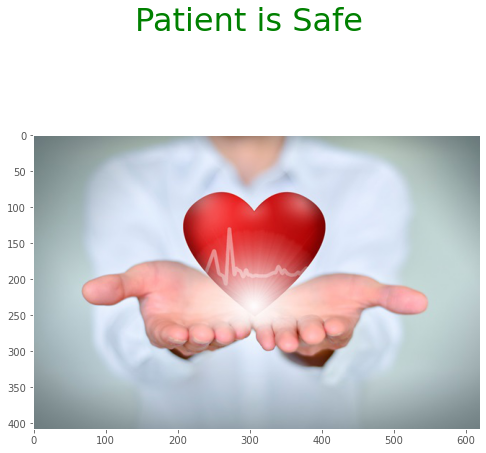

In [0]:
import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
final_pred_ = np.array([])
final_prediction = np.append(final_pred_, statistics.mode([pred1_[0], pred2_[0], pred3_[0]]))
if (final_prediction[0]==1):
  images_1 = []
  for img_path in glob.glob('/content/Hd2.jpg'):
    images_1.append(mpimg.imread(img_path))
    fig = plt.figure(figsize=(8,8))
    fig.suptitle('Patient is in critical condition', color='Red', size=32)
    plt.imshow(images_1[0], cmap='gray')
elif (final_prediction[0]==0):
  images_1 = []
  for img_path in glob.glob('/content/Safe.jpg'):
    images_1.append(mpimg.imread(img_path))
    fig = plt.figure(figsize=(8,8))
    fig.suptitle('Patient is Safe', color='green', size=32)
    plt.imshow(images_1[0], cmap='gray') 
